In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./rai-rawdump/rai_dataset.csv')
df.head()

/tmp/ipykernel_4938/3425906299.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./rai-rawdump/rai_dataset.csv')


,casted,convivaSessionId,chipset,bufferStatus,bitRate,startFrameNumber,adOrVideo,deviceDetails,contentID,qualityResolution,...,videoType,freePreview,lastGAEvents,statsforNerd,errorType,packName,playerSource,customLog,timestamp_fe,videoSessionId
0,False,NaN,mantis,24.0,2688.0,-1.00000,Video,AFTMM Amazon,1.000009e+09,1280x720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09-05-2023::20:58:05,NaN
1,NaN,NaN,A10 - 2.34 GHz,9.0,4000.0,327.97683,Video,iPhone 7,1.000218e+09,256 x 144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,A14 - 2.99 GHz,11.0,1000.0,NaN,Ad,iPhone 12,1.000036e+09,640 x 360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,A15 - 3.23 GHz,8.0,4000.0,NaN,Video,iPhone 14 Pro Max,1.000219e+09,256 x 144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,A12X - 2.5 GHz,10.0,4000.0,NaN,Video,iPad Pro (11-inch) (1st generation),1.000219e+09,256 x 144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['IssueDetails'].isna().sum()

89225

In [4]:
df.shape

(324701, 62)

In [5]:
df['IssueDetails']=df['IssueDetails'].fillna('Unknown')

In [6]:
df['IssueDetails'].isna().sum()

0

In [7]:
df_filter = df.loc[df["IssueDetails"].str.contains("video did not start")]

In [39]:
df['IssueDetails'].replace("video is not started",'Video did not start',inplace=True)

In [40]:
count_issue=df.IssueDetails.value_counts()

In [75]:
count_issue[0:7]

Unknown                                  89225
Video did not start                      78804
Video frequently buffering or lagging    35089
Video stopped playing in between         33299
Issue with audio or subtitles            29144
Video is blurry/pixelated                18711
Seeing a blank screen                    14988
Name: IssueDetails, dtype: int64

In [76]:
count_issue[7:].sum()

25441

In [46]:
# values = df['your_column'].value_counts(dropna=False).keys().tolist()
# counts = df['your_column'].value_counts(dropna=False).tolist()
# value_dict = dict(zip(values, counts))

In [77]:
values = df['IssueDetails'].value_counts(dropna=False)[0:7].keys().tolist()
counts = df['IssueDetails'].value_counts(dropna=False)[0:7].tolist()
value_dict = dict(zip(values, counts))

In [78]:
value_dict

{'Unknown': 89225,
 'Video did not start': 78804,
 'Video frequently buffering or lagging': 35089,
 'Video stopped playing in between': 33299,
 'Issue with audio or subtitles': 29144,
 'Video is blurry/pixelated': 18711,
 'Seeing a blank screen': 14988}

In [79]:
value_dict['Other']=count_issue[8:].sum()

In [80]:
value_dict

{'Unknown': 89225,
 'Video did not start': 78804,
 'Video frequently buffering or lagging': 35089,
 'Video stopped playing in between': 33299,
 'Issue with audio or subtitles': 29144,
 'Video is blurry/pixelated': 18711,
 'Seeing a blank screen': 14988,
 'Other': 25341}

In [81]:
X= value_dict.keys()
Y= value_dict.values()
df_issue = pd.DataFrame({'X':X,'Y':Y})

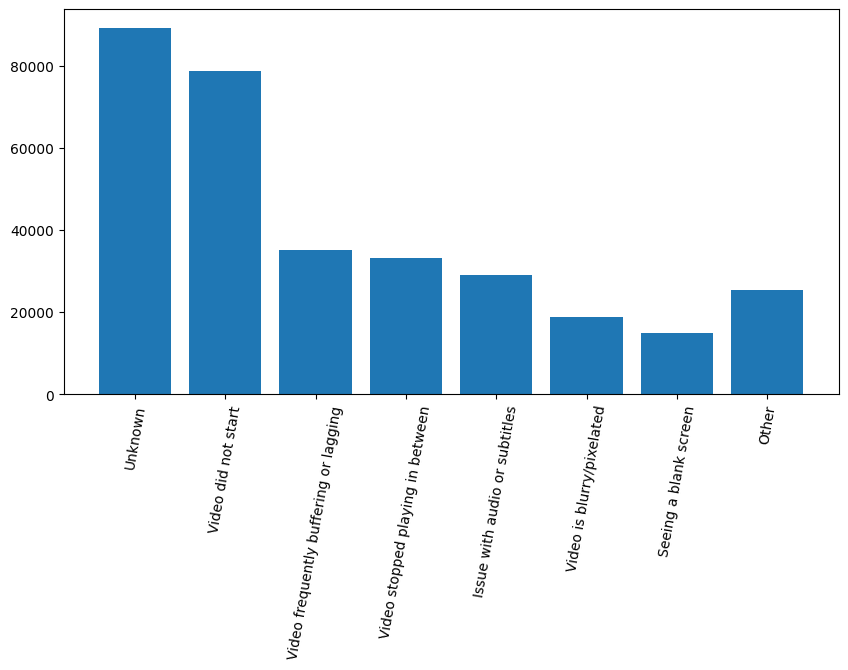

In [139]:
plt.figure(figsize=(10,5))
plt.bar(X,Y)
plt.xticks(rotation=80)
plt.savefig('barchart.jpg')
plt.show()

<Figure size 1000x500 with 0 Axes>

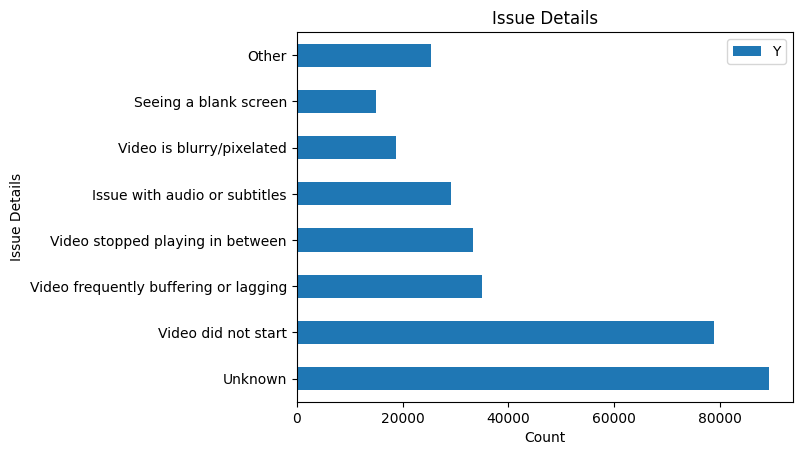

In [140]:
plt.figure(figsize=(10,5))
df_issue.plot.barh(x='X', y='Y',title='Issue Details')
plt.xlabel("Count")
plt.ylabel("Issue Details")
plt.savefig('barcharth.jpg')
plt.show()

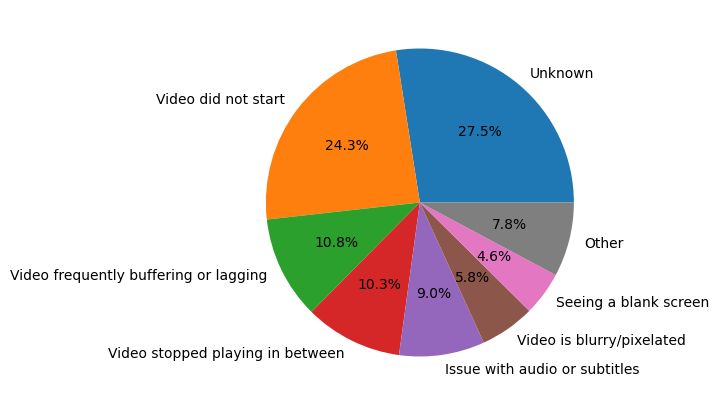

In [124]:
plt.figure(figsize=(10,5))
plt.pie(Y,labels = X,autopct='%1.1f%%')
plt.xticks(rotation=80)
# plt.legend(loc=5)
plt.show()

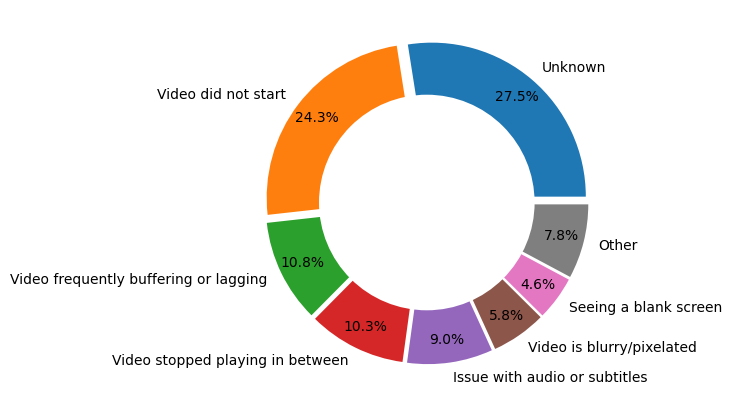

In [135]:
plt.figure(figsize=(10,5))
explode = (0.05,0.05,0.05,0.05, 0.05,0.05,0.05,0.05)
plt.pie(Y, labels=X,autopct='%1.1f%%', pctdistance=0.85,explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig('image.jpg')
plt.show()